In [ ]:
import cv2
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
#from keras as backend as K
#K.common.set_image_dim_ordering('th')
from keras.models import model_from_json

In [ ]:
try:
    if K.backend() == 'theano':
        K.set_image_data_format('channels_first')
    else:
        K.set_image_data_format('channels_last')
except AttributeError:
    if K._BACKEND == 'theano':
        K.set_image_dim_ordering('th')
    else:
        K.set_image_dim_ordering('tf')

In [ ]:
json_file = open('/content/drive/MyDrive/model/model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/model/model_final.h5")

In [ ]:
import matplotlib.pyplot as plt


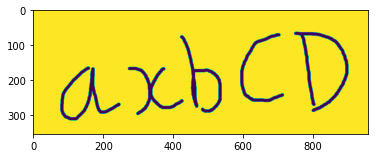

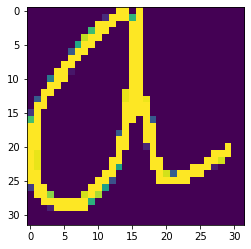

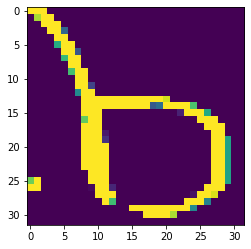

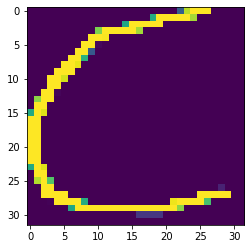

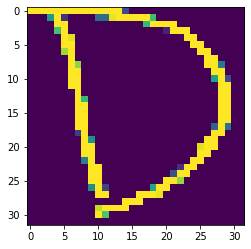

In [ ]:
import cv2
import numpy as np
img = np.asarray(cv2.imread('/content/drive/MyDrive/model/test4.png', 0))
#kernel = np.ones((3,3),np.uint8)
plt.imshow(img)
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()
#erosion = cv2.erode(img,kernel,iterations = 3)
#dilation = cv2.dilate(img,kernel,iterations = 1)
#img=dilation
if img is not None:
    #images.append(img)
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(32)
    h=int(32)
    train_data=[]
    #print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    #print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    #print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    #print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    #print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        

        im_resize = cv2.resize(im_crop,(32,32))
        plt.imshow(im_resize)
        plt.show()
        #cv2.imshow("work",im_resize)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        #im_resize=np.reshape(im_resize,(1,32,32))
        train_data.append(im_resize)

In [ ]:
train_data.shape

AttributeError: ignored

In [ ]:
train_data = np.array(train_data)

In [ ]:
train_data = train_data.reshape(-1,32,32)

In [ ]:
for i in range(len(train_data)):
  train_data[i] = cv2.fastNlMeansDenoising(train_data[i], train_data[i], h = 10, templateWindowSize = 7, 	searchWindowSize = 21) 
  plt.imshow(train_data[i])

In [ ]:
train_data = np.array(train_data)

In [ ]:
train_data.shape

(4, 32, 32)

In [ ]:
train_data = train_data.reshape(-1, 32, 32, 1)

In [ ]:
train_data

In [ ]:
train_data = train_data/255

In [ ]:
train_data = 1 - train_data

In [ ]:
pred = loaded_model.predict(train_data)

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/model/labels.csv")

In [ ]:
data.shape

In [ ]:
data

In [ ]:
data = np.array(data)

In [ ]:
data

In [ ]:
symbols = []
for i in range(len(data) - 1):
    if (data[i + 1][2]>data[i][2]):
        symbols.append(data[i][3])
        

In [ ]:
symbols

In [ ]:
alpha = "0abcdefghijklmnopqrstuvwxyz"

In [ ]:
train_data.shape

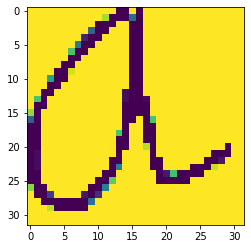

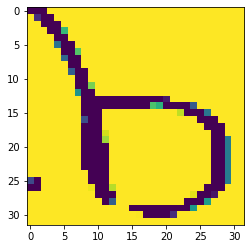

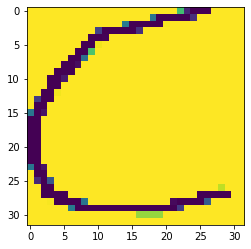

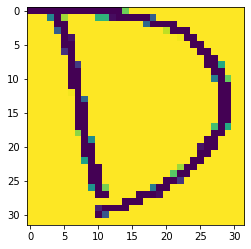

\omega\flat\subset\nu
[97, 287, 106, 84]


In [ ]:
s=''
a=[]

for i in range(len(train_data)):
    s = s + symbols[pred[i].argmax()]
    a.append(pred[i].argmax())
    im_resize = cv2.resize(train_data[i],(32,32))
    plt.imshow(im_resize)
    plt.show()
print(s)
print(a)

In [ ]:
symbols.type

In [ ]:
symbols = np.array(symbols)

In [ ]:
test = cv2.imread("/content/y.png", cv2.IMREAD_GRAYSCALE)

In [ ]:
test = np.array(test)

In [ ]:
test.shape

In [ ]:
test = test.reshape(-1,32,32,1)
test.shape

In [ ]:
prediction = loaded_model.predict()

In [ ]:
image = cv2.imread("/content/d.png", cv2.IMREAD_GRAYSCALE)
image = np.array(image)

In [ ]:
image.shape

In [ ]:
plt.imshow(image)
plt.show

In [ ]:
image = image.reshape(-1,32,32,1)

In [ ]:
y = loaded_model.predict(image)

In [ ]:
y

In [ ]:
a = y.argmax()

In [ ]:
a

In [ ]:
symbols[a]